In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
import os

In [3]:
os.chdir('D:/AI/Project/house_price_prediction')

In [4]:
pwd

'D:\\AI\\Project\\house_price_prediction'

In [5]:
df = pd.read_csv("D:/AI/Project/house_price_prediction/HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [25]:
df.info()
#Check data miss
df.isnull().sum()

#Statistics data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,10.768775,11.028893,0.067194,0.554695,6.284634,68.845850,3.795043,9.549407,408.237154,18.455534,356.674032,12.664625,22.532806
std,8.570832,23.025124,6.704679,0.250605,0.115878,0.702617,27.486962,2.105710,8.707259,168.537116,2.164946,91.294864,7.017219,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df_cleaned = df.dropna() #delete row without value

In [8]:
df.fillna(df.median(), inplace=True) #replace 'N/A' to median

In [9]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

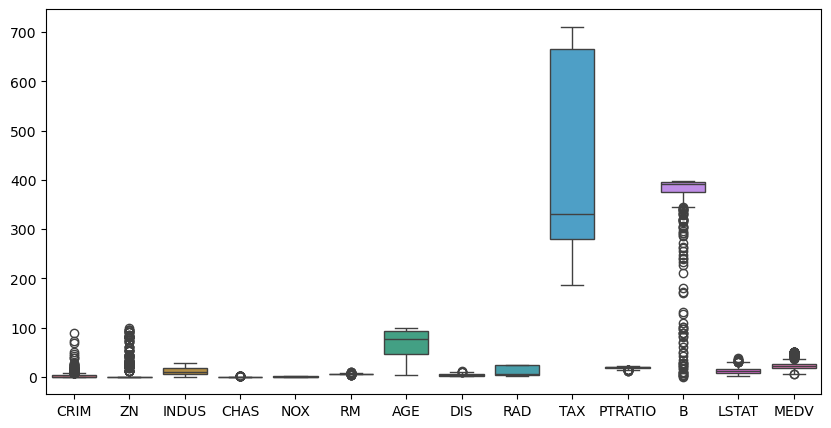

In [10]:
#check outliers
plt.figure(figsize=(10,5))
sns.boxplot(data = df)
plt.show()

In [21]:
#Remove outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_iqr = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


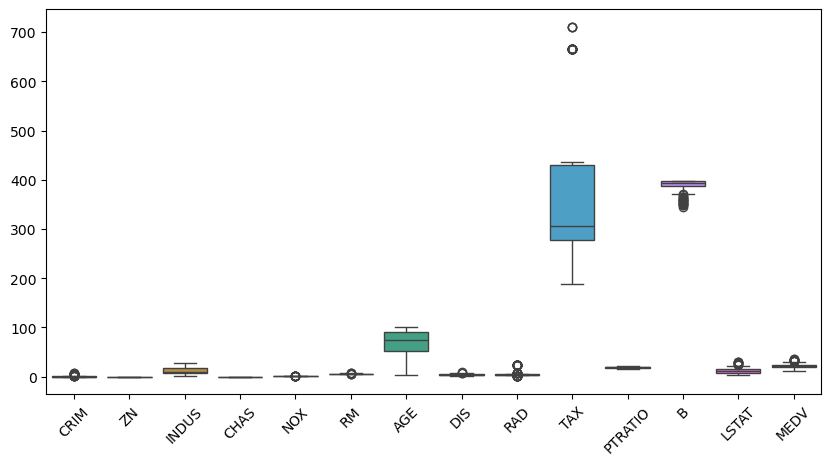

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_iqr)
plt.xticks(rotation=45)
plt.show()


In [22]:
#Check the number of missing values in each column
print(df_iqr.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [24]:
#Feature Scaling: Use max-min scaling to transform the data into the range [0;1]
scaler = MinMaxScaler()
df_iqr_scaled = pd.DataFrame(scaler.fit_transform(df_iqr), columns = df_iqr.columns)
print(df_iqr_scaled.describe)

<bound method NDFrame.describe of          CRIM   ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0    0.000344  0.0  0.219706   0.0  0.122271  0.604059  0.782698  0.486315   
1    0.000341  0.0  0.219706   0.0  0.122271  0.908078  0.599382  0.486315   
2    0.001091  0.0  0.035108   0.0  0.098253  0.833665  0.441813  0.633383   
3    0.006504  0.0  0.035108   0.0  0.098253  0.892957  0.528321  0.633383   
4    0.000719  0.0  0.035108   0.0  0.098253  0.607640  0.574665  0.633383   
..        ...  ...       ...   ...       ...       ...       ...       ...   
212  0.005556  0.0  0.403171   0.0  0.349345  0.672503  0.681771  0.152118   
213  0.002994  0.0  0.403171   0.0  0.349345  0.484282  0.760041  0.126454   
214  0.005280  0.0  0.403171   0.0  0.349345  0.824910  0.907312  0.110338   
215  0.012486  0.0  0.403171   0.0  0.349345  0.752487  0.889804  0.140071   
216  0.003310  0.0  0.403171   0.0  0.349345  0.448468  0.761071  0.155663   

          RAD       TAX   PTR

In [26]:
df_iqr_scaled.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000344,0.0,0.219706,0.0,0.122271,0.604059,0.782698,0.486315,0.043478,0.10325,0.476923,1.000000,0.232995,0.401639
1,0.000341,0.0,0.219706,0.0,0.122271,0.908078,0.599382,0.486315,0.043478,0.10325,0.476923,0.921716,0.040962,0.938525
2,0.001091,0.0,0.035108,0.0,0.098253,0.833665,0.441813,0.633383,0.086957,0.06501,0.615385,0.956338,0.000000,0.885246
3,0.006504,0.0,0.035108,0.0,0.098253,0.892957,0.528321,0.633383,0.086957,0.06501,0.615385,1.000000,0.319053,1.000000
4,0.000719,0.0,0.035108,0.0,0.098253,0.607640,0.574665,0.633383,0.086957,0.06501,0.615385,0.946528,0.085306,0.692623


In [37]:
#Split data to data train & data test

#Split input variables(X) and target variable(Y)
X = df_iqr_scaled.drop(columns=['MEDV'])
y = df_iqr_scaled['MEDV']

#Split into training set(80%) and test(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

#check size
print(f'Number of train sample: {X_train.shape[0]}')
print(f'Number of sample test: {X_test.shape[0]}')

Number of train sample: 173
Number of sample test: 44


In [48]:
#Initialize model linear regression
model = LinearRegression()

#Train the model on training set
model.fit(X_train, y_train)

#Prediction on test set
y_pred = model.predict(X_test)

In [46]:
#'weights': trọng số
print("weights:", model.coef_)
print("bias:", model.intercept_)


weights: [ 1.87056753e-02 -1.24900090e-16 -3.51538120e-02 -5.55111512e-17
 -1.05807187e-01  6.25304531e-01 -2.05810537e-01 -2.73622416e-01
  1.15559928e-01 -2.00633771e-01 -1.64677063e-01 -2.41020029e-02
 -1.33276291e-01]
bias: 0.5469406775105299


In [45]:
print("House price prediction (the fist 5 sample):", y_pred[:5])
print("House price real (the fist 5 sample):", y_test[:5].values)


House price prediction (the fist 5 sample): [0.38484633 0.5649553  0.36894497 0.25764999 0.17944493]
House price real (the fist 5 sample): [0.5204918  0.49590164 0.34836066 0.46721311 0.1557377 ]


In [47]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#If the MES is smaller, model is better 
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
# If the R² score is near 1, the model is better

Mean Squared Error (MSE): 0.017382640057796956
R² Score: 0.5850339059889387


In [50]:
from sklearn.svm import SVR

#Initialize SVR model with'rbf' (usually give the best results)
svr_model = SVR(kernel='rbf')

#Train model on training set
svr_model.fit(X_train, y_train)


SVR()

In [51]:
#House price prediction on test set
y_pred_svr = svr_model.predict(X_test)

print('House price prediction (the first 5 sample):', y_pred_svr[:5])
print('House price real (the first 5 sample):', y_test[:5].values)

House price prediction (the first 5 sample): [0.3674882  0.47003423 0.36411448 0.27566383 0.18265924]
House price real (the first 5 sample): [0.5204918  0.49590164 0.34836066 0.46721311 0.1557377 ]


In [52]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print('MSE_SVR:', mse_svr)
print('R² Score - SVR: ',r2_svr)

MSE_SVR: 0.015885405641067128
R² Score - SVR:  0.6207765501248979


In [56]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Initialize RandomForest with 100trees 
rf_model = RandomForestRegressor(n_estimators= 100, random_state= 42)

#Train model 
rf_model.fit(X_train, y_train)

#Prediction
y_pred_rf = rf_model.predict(X_test)

#Evalute model 
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

#Results
print('MSE_RandomForestRegressor: ', mse_rf)
print('R² Score - Random Forest: ', r2_rf)



MSE_RandomForestRegressor:  0.01871145357430798
R² Score - Random Forest:  0.5533118802907566


In [58]:
#After testing, SVR is the best model for predicting house prices, so I use SVR to predict all data


In [60]:
#Training SVR again with all data 
svr_final = SVR(kernel= 'rbf', C = 100, gamma = 0.1, epsilon = 0.1)
svr_final.fit(X,y)

#Predict with all data
y_pred_final = svr_final.predict(X)

#Evalute model with all data
mse_final = mean_squared_error(y, y_pred_final)
r2_final = r2_score(y, y_pred_final)

print('MSE_SVR (Full Data): ', mse_final)
print('R² Score_SVR (Full Data): ',r2_final)

MSE_SVR (Full Data):  0.0062351106633516985
R² Score_SVR (Full Data):  0.8242201655219732
